In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss,accuracy_score
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("/content/mcdonalds.csv")

In [3]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
df.shape

(1453, 15)

In [5]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
df.replace({"No": 0, "Yes": 1}, inplace=True)

In [7]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [8]:
x=df.iloc[:,:11]

In [9]:
x.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [10]:
x=np.array(x)
MD_x=np.round(np.mean(x,axis=0),2)

In [11]:
print(MD_x)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [12]:
pca=PCA()
MD_pca=pca.fit(x)
MD_comp=np.round(MD_pca.components_,3)
MD_comp

array([[-0.477, -0.155, -0.006,  0.116,  0.304, -0.108, -0.337, -0.472,
         0.329, -0.214,  0.375],
       [ 0.364,  0.016,  0.019, -0.034, -0.064, -0.087, -0.611,  0.307,
         0.601,  0.077, -0.14 ],
       [-0.304, -0.063, -0.037, -0.322, -0.802, -0.065, -0.149, -0.287,
         0.024,  0.192, -0.089],
       [ 0.055, -0.142,  0.198, -0.354,  0.254, -0.097,  0.119, -0.003,
         0.068,  0.763,  0.37 ],
       [-0.308,  0.278,  0.071, -0.073,  0.361,  0.108, -0.129, -0.211,
        -0.003,  0.288, -0.729],
       [ 0.171, -0.348, -0.355, -0.407,  0.209, -0.595, -0.103, -0.077,
        -0.261, -0.178, -0.211],
       [-0.281, -0.06 ,  0.708, -0.386,  0.036, -0.087, -0.04 ,  0.36 ,
        -0.068, -0.35 , -0.027],
       [ 0.013, -0.113,  0.376,  0.59 , -0.138, -0.628,  0.14 , -0.073,
         0.03 ,  0.176, -0.167],
       [ 0.572, -0.018,  0.4  , -0.161, -0.003,  0.166,  0.076, -0.639,
         0.067, -0.186, -0.072],
       [-0.11 , -0.666, -0.076, -0.005,  0.009,  0.24 ,

In [13]:
projection = MD_pca.components_.T * np.sqrt(MD_pca.explained_variance_)

In [14]:
MD_pca.explained_variance_

array([0.57312398, 0.36900226, 0.2546408 , 0.15904032, 0.11384214,
       0.09627033, 0.08392454, 0.07569209, 0.07035814, 0.06192225,
       0.05612296])

In [15]:
projection

array([[-3.61062270e-01,  2.20986128e-01, -1.53628377e-01,
         2.19986067e-02, -1.03763875e-01,  5.29757254e-02,
        -8.12654949e-02,  3.58791168e-03,  1.51830465e-01,
        -2.74433629e-02,  1.07646304e-02],
       [-1.17593706e-01,  9.97077402e-03, -3.15464356e-02,
        -5.67988756e-02,  9.36663455e-02, -1.07922835e-01,
        -1.73059170e-02, -3.11104288e-02, -4.89795181e-03,
        -1.65683252e-01, -1.28310454e-01],
       [-4.81208051e-03,  1.14254458e-02, -1.86803378e-02,
         7.88102868e-02,  2.38275983e-02, -1.10174355e-01,
         2.05000559e-01,  1.03427703e-01,  1.06174649e-01,
        -1.88209353e-02,  3.35762202e-02],
       [ 8.79931408e-02, -2.07105622e-02, -1.62668873e-01,
        -1.41230038e-01, -2.47671292e-02, -1.26131412e-01,
        -1.11806587e-01,  1.62218071e-01, -4.25760567e-02,
        -1.32834990e-03,  5.94412622e-02],
       [ 2.30478197e-01, -3.87792593e-02, -4.04893113e-01,
         1.01278932e-01,  1.21937817e-01,  6.49550939e-02,
  

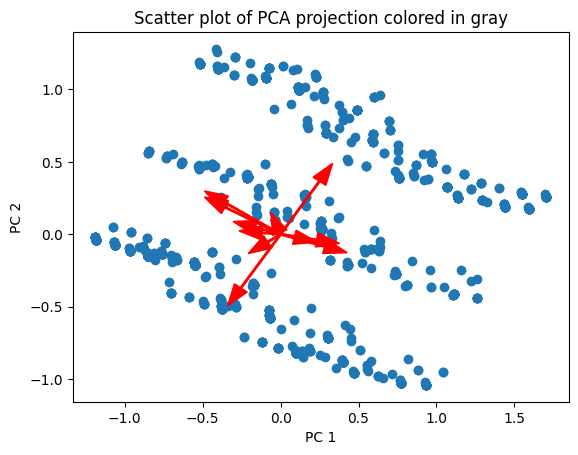

In [16]:
plt.scatter(MD_pca.transform(x)[:,0],MD_pca.transform(x)[:,1])
for i in range(len(projection)):
  plt.arrow(0, 0, projection[i, 0], projection[i, 1],
          color='r', width=0.01, head_width=0.1)
  # plt.arrow(0, 0, MD_comp[i, 0], MD_comp[i, 1],
  #         color='g', width=0.01, head_width=0.1)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Scatter plot of PCA projection colored in gray')
plt.show()

In [17]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(1234)

range_n_clusters = range(2, 9)
silhouette_scores = []
for n_clusters in range_n_clusters:
    kmeans_model = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    cluster_labels = kmeans_model.fit_predict(x)
    
    silhouette_avg = silhouette_score(x, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]

kmeans_model = KMeans(n_clusters=optimal_n_clusters, n_init=10, random_state=1234)
cluster_labels = kmeans_model.fit_predict(x)

print('Cluster labels:')
print(cluster_labels)


Cluster labels:
[4 2 5 ... 5 3 0]


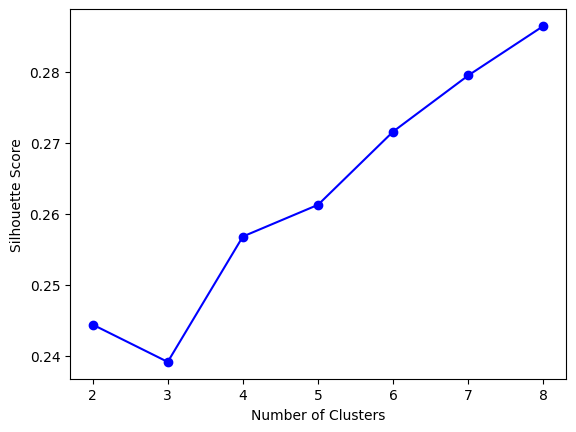

In [18]:
plt.plot(range_n_clusters, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

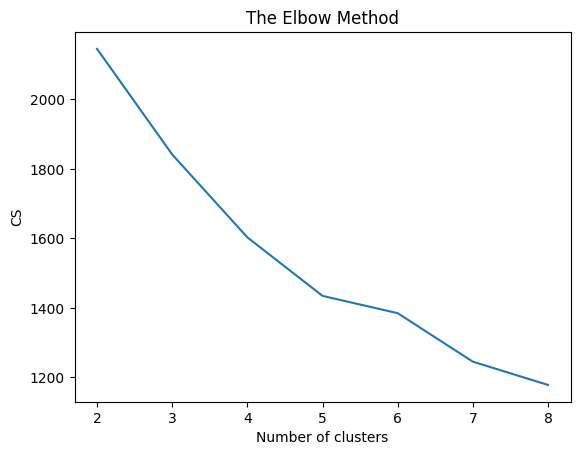

In [36]:
cs = []
for i in range(2, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(2, 9), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [37]:
y=np.array(df.iloc[:,0])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


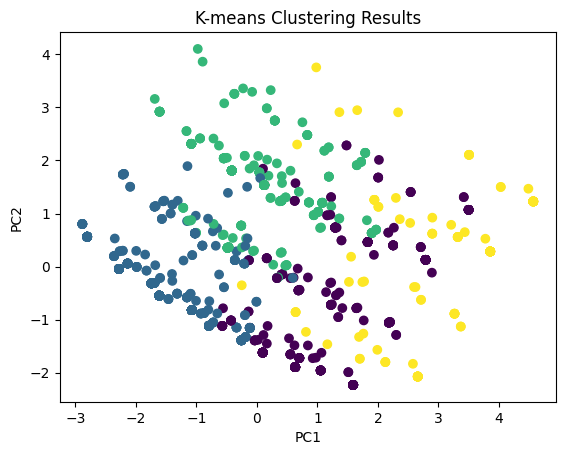

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
seg_vars_std = scaler.fit_transform(x)

pca = PCA(n_components=2)
seg_vars_pca = pca.fit_transform(seg_vars_std)

kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(seg_vars_std)

plt.scatter(seg_vars_pca[:, 0], seg_vars_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering Results')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()